# Site 734 Late Sorted v. Late Not Sorted
This notebook calculates and plots the enrichment of codons at site 734 in the Late Sorted gDNA samples compared to the Late Not Sorted gDNA samples.

**Sample Info**

In [1]:
stage = "late"
sort_status = "sorted"

## Notebook setup
Imports

In [2]:
import pandas as pd
import plotnine as p9

# print imports and versions
# copied from https://stackoverflow.com/questions/40428931/package-for-listing-version-of-packages-used-in-a-jupyter-notebook
print('\n'.join(f'{m.__name__}=={m.__version__}' \
                for m in globals().values() if getattr(m, '__version__', None)))

%run ../../functions/enrichment.py.ipynb import calculate_enrichment

pandas==0.25.3
plotnine==0.6.0


Input data

In [3]:
site_734_counts = '../../results/site_734/site_734_counts.csv'
permitted_codons_file = '../../results/site_734/permitted_codons.csv'
stat2_luciferase_file = '../../data/STAT2_luciferase_results.csv'

Output data

In [4]:
site_734_dir = '../../results/site_734/'

Notebook aesthetics

In [5]:
p9.theme_set(p9.theme_classic())
CBPALETTE_RICH = ['#648FFF', '#FFB000', '#DC267F', '#785EF0', '#FE6100']

## Load data
Load site 734 frequencies

In [6]:
codon_counts = pd.read_csv(site_734_counts)
display(codon_counts)

,codon,count,library,name,site,sorted,source,stage,wildtype,letter
0,AAC,0.000000,wt,wt-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,N
1,AAC,33.000000,wt,wt-gDNA-noStage-notSorted,734,notSorted,gDNA,noStage,GAT,N
2,AAC,129.000000,lib1,lib1-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,N
3,AAC,54.000000,lib2,lib2-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,N
4,AAC,83.000000,lib3,lib3-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,N
...,...,...,...,...,...,...,...,...,...,...
479,TAC,74.000000,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,Y
480,TGA,85.333333,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,O
481,TGC,67.666667,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,C
482,TGG,83.000000,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,W


In [7]:
codon_counts['name'].unique()

array(['wt-plasmid-noStage-notSorted', 'wt-gDNA-noStage-notSorted',
       'lib1-plasmid-noStage-notSorted', 'lib2-plasmid-noStage-notSorted',
       'lib3-plasmid-noStage-notSorted', 'lib1-gDNA-early-notSorted',
       'lib2-gDNA-early-notSorted', 'lib3-gDNA-early-notSorted',
       'lib1-gDNA-mid-notSorted', 'lib2-gDNA-mid-notSorted',
       'lib3-gDNA-mid-notSorted', 'lib1-gDNA-late-notSorted',
       'lib2-gDNA-late-notSorted', 'lib3-gDNA-late-notSorted',
       'lib1-gDNA-late-sorted', 'lib2-gDNA-late-sorted',
       'lib3-gDNA-late-sorted', 'mean-gDNA-early-notSorted',
       'mean-gDNA-late-notSorted', 'mean-gDNA-late-sorted',
       'mean-gDNA-mid-notSorted', 'mean-plasmid-noStage-notSorted'],
      dtype=object)

## Plot enrichment for each library:

In [8]:
libs = ['lib1', 'lib2', 'lib3']

Calculating enrichment between:
lib1-gDNA-late-sorted and lib1-gDNA-late-notSorted


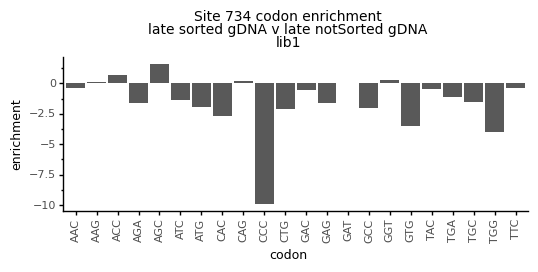

<ggplot: (8746290066981)>

Calculating enrichment between:
lib2-gDNA-late-sorted and lib2-gDNA-late-notSorted


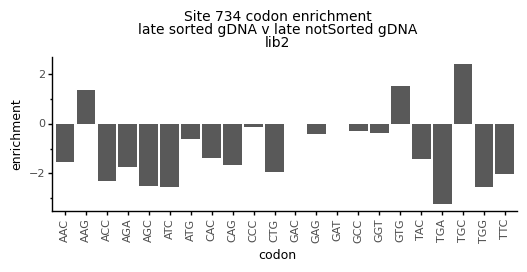

<ggplot: (8746290038337)>

Calculating enrichment between:
lib3-gDNA-late-sorted and lib3-gDNA-late-notSorted


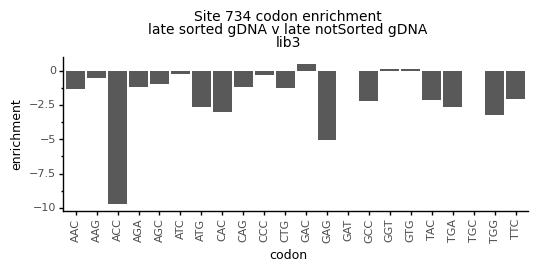

<ggplot: (8746281130885)>

In [9]:
for lib in libs:
    selected_sample = f'{lib}-gDNA-{stage}-{sort_status}'
    reference_sample = f'{lib}-gDNA-late-notSorted'
    print('Calculating enrichment between:')
    print(f'{selected_sample} and {reference_sample}')
    enrichment_df = calculate_enrichment(
        codon_counts,
        selected_sample,
        reference_sample)
    enrichment_plot = (p9.ggplot(enrichment_df) +
                    p9.aes(x='codon',
                           y='enrichment') +
                    p9.geom_bar(stat='identity') +
                    p9.ggtitle('Site 734 codon enrichment\n'
                               f'{stage} {sort_status} gDNA v late notSorted gDNA\n'
                               f'{lib}') +
                    p9.labs(x='codon',
                            y='enrichment') +
                    p9.theme(figure_size=(6, 2),
                             plot_title=p9.element_text(size=10),
                             axis_title=p9.element_text(size=9),
                             axis_text_x=p9.element_text(size=8, rotation=90),
                             axis_text_y=p9.element_text(size=8))
                   )

    display(enrichment_plot)

## Comparison to STAT2 antagonism luciferase assay
Each of these amino acids has previously been tested for ability to antagonize STAT2 in a luciferase assay. How do the sequencing-based enrichment scores correlate with the luciferase assay results?

In [10]:
stat2_results = pd.read_csv(stat2_luciferase_file)
display(stat2_results.sort_values(by='FLUC_RLUC'))

,amino_acid,FLUC_RLUC
20,D,1.6
19,E,6.4
18,S,48.9
17,C,54.3
16,N,77.9
15,T,88.8
14,W,90.7
13,Q,95.2
12,H,96.8
11,A,105.8


Calculate enrichment for mean counts:

In [11]:
lib = "mean"

enrichment_df = calculate_enrichment(
    codon_counts,
    selected_sample=f'{lib}-gDNA-{stage}-{sort_status}',
    reference_sample=f'{lib}-gDNA-late-notSorted')
display(enrichment_df)

,codon,letter,count_selected,count_pseudo_selected,count_reference,count_pseudo_reference,enrichment
0,AAC,N,29.666667,29.766667,53.666667,53.766667,-1.106097
1,AAG,K,57.000000,57.100000,42.666667,42.766667,0.163921
2,ACC,T,25.666667,25.766667,68.333333,68.433333,-1.662276
3,AGA,R,40.000000,40.100000,94.000000,94.100000,-1.483675
4,AGC,S,42.000000,42.100000,84.333333,84.433333,-1.257075
5,ATC,I,70.666667,70.766667,138.666667,138.766667,-1.224602
6,ATG,M,49.000000,49.100000,131.333333,131.433333,-1.673619
7,CAC,H,24.000000,24.100000,105.333333,105.433333,-2.382309
8,CAG,Q,71.333333,71.433333,122.000000,122.100000,-1.026477
9,CCC,P,42.666667,42.766667,68.333333,68.433333,-0.931295


Plot correlation to luciferase assay:

,enrichment,amino_acid,FLUC_RLUC
12,0.015798,D,1.6
11,-0.046535,D,1.6
13,-1.140574,E,6.4
4,-1.257075,S,48.9
19,-0.192742,C,54.3
0,-1.106097,N,77.9
2,-1.662276,T,88.8
20,-3.366178,W,90.7
8,-1.026477,Q,95.2
7,-2.382309,H,96.8


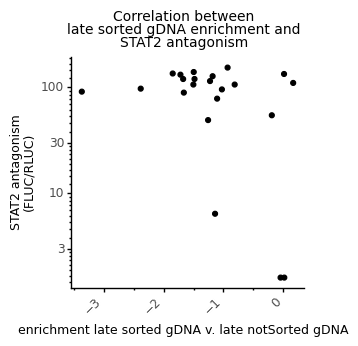

<ggplot: (8746290051129)>

In [12]:
enrichment_stat2_corr = (pd.merge(
    left=enrichment_df[['letter','enrichment']],
    right=stat2_results,
    left_on='letter',
    right_on='amino_acid',
    how='outer')
    .drop(columns='letter'))
display(enrichment_stat2_corr.sort_values(by='FLUC_RLUC'))

enrichment_stat2_corr_plot = (
    p9.ggplot(enrichment_stat2_corr) +
    p9.aes(x='enrichment',
           y='FLUC_RLUC') +
    p9.geom_point() +
    p9.ggtitle(f'Correlation between\n{stage} {sort_status} gDNA enrichment and\nSTAT2 antagonism') +
    p9.labs(x=f'enrichment {stage} {sort_status} gDNA v. late notSorted gDNA',
            y='STAT2 antagonism\n(FLUC/RLUC)') +
    p9.scale_y_log10() +
    p9.theme(figure_size=(3,3),
             plot_title=p9.element_text(size=10),
             axis_title=p9.element_text(size=9),
             axis_text_x=p9.element_text(rotation=45, hjust=1),
             legend_position='right',
             legend_title=p9.element_text(size=10),
             legend_title_align='center'))

display(enrichment_stat2_corr_plot)